# Homework 6 (30 marks)
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW6_lastname_firstname.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission.

NOTE: Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 04/09/2021 (Friday).

Please ensure you follow all the steps mentioned in the homework.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below -

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name'))

Import all the libraries you require in the cell below.



In [ ]:
# Enter your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

### 1. Build a classification model that predicts the edibility of mushrooms (class variable in the dataset). You have been provide with a dataset as a mushrooms.csv file. 
Here is a description of the attributes


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy (8 marks)

A. Read the dataset, explore it and determine what is the dependent variable (1 mark)

B. Store the feature and target variable. (2 marks)

C. Convert all categorical variables into dummy variables (1 mark)

D. Partition the data into training and test sets (70/30) (1 mark)

E. Fit the training data to a classification tree. (3 marks)

In [ ]:
# Enter your code here
#1A
df = pd.read_csv('mushrooms.csv')

#exploration
print(df.head())
print(df.info())
print(df.columns.values)
print(df.isnull().sum())

#The dependent variable should be class, because a combination all of the other attributes determine if the mushroom is poisonous or edible.


  class cap-shape cap-surface  ... spore-print-color population habitat
0     p         x           s  ...                 k          s       u
1     e         x           s  ...                 n          n       g
2     e         b           s  ...                 n          n       m
3     p         x           y  ...                 k          s       u
4     e         x           s  ...                 n          a       g

[5 rows x 23 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   g

In [ ]:
#1B

#store feature variables
X = df.iloc[:,1:]

#store target variable
y = df.iloc[:,0]

print(X)
print(y)

     cap-shape cap-surface cap-color  ... spore-print-color population habitat
0            x           s         n  ...                 k          s       u
1            x           s         y  ...                 n          n       g
2            b           s         w  ...                 n          n       m
3            x           y         w  ...                 k          s       u
4            x           s         g  ...                 n          a       g
...        ...         ...       ...  ...               ...        ...     ...
8119         k           s         n  ...                 b          c       l
8120         x           s         n  ...                 b          v       l
8121         f           s         n  ...                 b          c       l
8122         k           y         n  ...                 w          v       l
8123         x           s         n  ...                 o          c       l

[8124 rows x 22 columns]
0       p
1       e
2     

In [ ]:
#1C

#convert categorical variables to dummy variables
Xdummies = pd.get_dummies(X)
print(Xdummies)


      cap-shape_b  cap-shape_c  cap-shape_f  ...  habitat_p  habitat_u  habitat_w
0               0            0            0  ...          0          1          0
1               0            0            0  ...          0          0          0
2               1            0            0  ...          0          0          0
3               0            0            0  ...          0          1          0
4               0            0            0  ...          0          0          0
...           ...          ...          ...  ...        ...        ...        ...
8119            0            0            0  ...          0          0          0
8120            0            0            0  ...          0          0          0
8121            0            0            1  ...          0          0          0
8122            0            0            0  ...          0          0          0
8123            0            0            0  ...          0          0          0

[8124 rows x 11

In [ ]:
#1D

#partition into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xdummies, y, test_size=0.3, random_state=2020, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5686, 117)
(5686,)
(2438, 117)
(2438,)


In [ ]:
#1E

#fit training data to classification tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth= 6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

2. Print the confusion matrix. 
Also visualize the confusion matrix using plot_confusion_matrix from sklearn.metrics (3 marks)



[[1263    0]
 [   3 1172]]


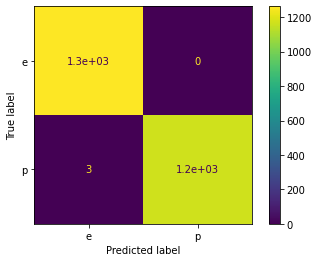

In [ ]:
# Enter your code here
y_test_pred = dt.predict(X_test)

cf = metrics.confusion_matrix(y_test, y_test_pred)
print(cf)

metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

3. Print the accuracy on the training partition?  (2 marks)


In [ ]:
# Enter your code here
y_train_pred = dt.predict(X_train)
print('Accuracy =', metrics.accuracy_score(y_train, y_train_pred))

Accuracy = 1.0


4. Print the accuracy on the test partition? (2 marks)


In [ ]:
# Enter your code here
print('Accuracy =', metrics.accuracy_score(y_test, y_test_pred))

Accuracy = 0.9987694831829368


5. Show the classification tree and save it (5 marks)


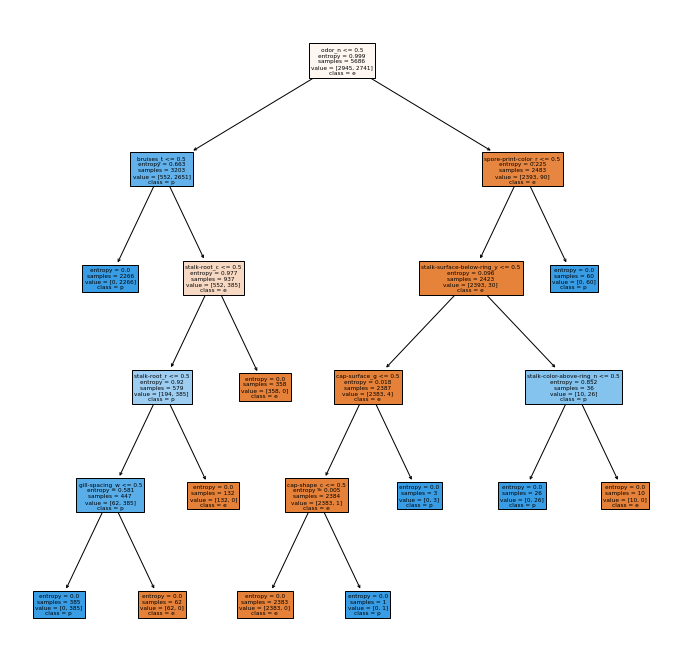

In [ ]:
# Enter your code here
fn = Xdummies.columns

plt.figure(figsize=(12,12))
classList = list(map(str,dt.classes_.tolist()))
a = tree.plot_tree(dt, feature_names=fn, class_names=classList, filled=True)
plt.savefig('Mushroom Tree.png')
plt.show()

6. Find and print the top three most important features in your decision tree for determining toxicity. (4 marks)

In [ ]:
# Enter your code here
importance = pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
importance_sorted = importance.sort_values(1, ascending=False)
print("Top 3 features by score:")
topThree = importance_sorted.iloc[:3]
print(topThree.to_string(index=False, header=False))


Top 3 features by score:
       odor_n  0.527899
    bruises_t  0.212695
 stalk-root_c  0.067373


7. Classify the following mushroom. (6 marks)

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [ ]:
# Enter your code here
columnNames = ['cap-shape', 'cap-surface','cap-color','bruises','odor','gill-attachment', 'gill-spacing', 'gill-size',
               'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
               'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
characteristics = [['x','s','n','t','y','f','c','n','k','e','e','s','s','w','w','p','w','o','p','r','s','u']]
sampleMushroom = pd.DataFrame(characteristics,columns=columnNames)
print("Sample given without dummy variables:")
print(sampleMushroom)

#change sampleMushroom to a dummies version of the same shape as Xdummies from #1C since decision tree is based on the dummy variable columns

#create copy of X, and append sampleMushroom to end
X_copy = X.copy()
X_copy.append(sampleMushroom, ignore_index=True)
#create dummies for X_copy, and save the last row (which was appended) as sampleMushroom dummies
XCopyDummies = pd.get_dummies(X_copy)
sampleMushroomDummies = XCopyDummies.tail(1)

print("Sample given with dummy variables:")
print(sampleMushroomDummies)

#use predict to see if sample mushroom is edible or not
pred = dt.predict(sampleMushroomDummies)
print("Predicted outcome for sample mushroom is",pred)
'''The sample mushroom is predicted to be edible.'''

Sample given without dummy variables:
  cap-shape cap-surface cap-color  ... spore-print-color population habitat
0         x           s         n  ...                 r          s       u

[1 rows x 22 columns]
Sample given with dummy variables:
      cap-shape_b  cap-shape_c  cap-shape_f  ...  habitat_p  habitat_u  habitat_w
8123            0            0            0  ...          0          0          0

[1 rows x 117 columns]
Predicted outcome for sample mushroom is ['e']


'The sample mushroom is predicted to be edible.'